In [3]:
import numpy as np
import matplotlib.pyplot as plt

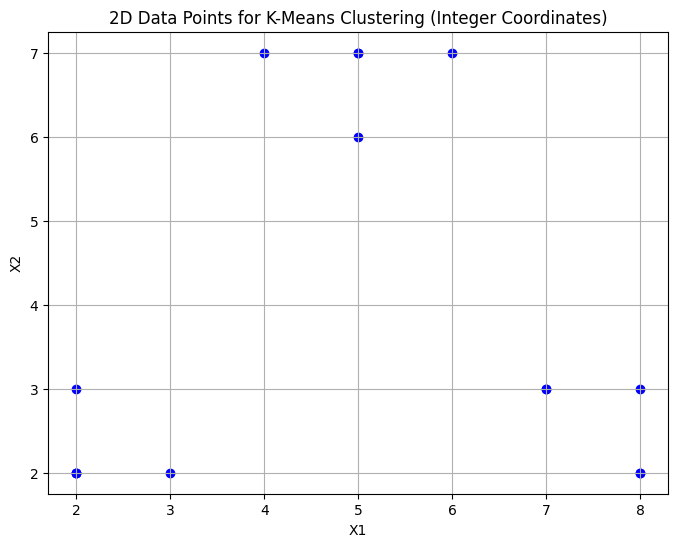

In [4]:
np.random.seed(42)

cluster_1 = np.round(np.random.normal(loc=[2, 2], scale=0.5, size=(5, 2))).astype(int)
cluster_2 = np.round(np.random.normal(loc=[8, 3], scale=0.5, size=(5, 2))).astype(int)
cluster_3 = np.round(np.random.normal(loc=[5, 7], scale=0.5, size=(5, 2))).astype(int)

data_points = np.vstack((cluster_1, cluster_2, cluster_3))

plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', marker='o')
plt.title('2D Data Points for K-Means Clustering (Integer Coordinates)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [5]:
data_points

array([[2, 2],
       [2, 3],
       [2, 2],
       [3, 2],
       [2, 2],
       [8, 3],
       [8, 2],
       [7, 3],
       [7, 3],
       [8, 2],
       [6, 7],
       [5, 6],
       [5, 7],
       [4, 7],
       [5, 7]])

In [6]:
data_points.shape

(15, 2)

In [10]:
k = 3

prev_center_points = np.zeros((k, 2))
center_points = data_points[np.random.choice(data_points.shape[0], size=k, replace=False)]

center_points_reshaped = center_points[:, np.newaxis, :]
data_points_reshaped = data_points[np.newaxis, :,  :]


In [8]:
center_points.shape

(3, 2)

In [9]:
center_points_reshaped.shape

(3, 1, 2)

In [223]:
center_points

array([[7, 3],
       [8, 2],
       [8, 3]])

In [11]:
center_points_reshaped[:,0,1]

array([2, 2, 7])

In [12]:
data_points_reshaped

array([[[2, 2],
        [2, 3],
        [2, 2],
        [3, 2],
        [2, 2],
        [8, 3],
        [8, 2],
        [7, 3],
        [7, 3],
        [8, 2],
        [6, 7],
        [5, 6],
        [5, 7],
        [4, 7],
        [5, 7]]])

In [13]:
data_points_reshaped[0,:,1]

array([2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 7, 6, 7, 7, 7])

In [17]:
x = center_points_reshaped[:,0,0].reshape((1, k)) - data_points_reshaped[0,:,0].reshape((15, 1))
y = center_points_reshaped[:,0,1].reshape((1, k)) - data_points_reshaped[0,:,1].reshape((15, 1))

euclidian_distance = np.sqrt(x**2 + y**2)
euclidian_distance

array([[0.        , 0.        , 6.40312424],
       [1.        , 1.        , 5.65685425],
       [0.        , 0.        , 6.40312424],
       [1.        , 1.        , 5.83095189],
       [0.        , 0.        , 6.40312424],
       [6.08276253, 6.08276253, 4.47213595],
       [6.        , 6.        , 5.38516481],
       [5.09901951, 5.09901951, 4.12310563],
       [5.09901951, 5.09901951, 4.12310563],
       [6.        , 6.        , 5.38516481],
       [6.40312424, 6.40312424, 0.        ],
       [5.        , 5.        , 1.41421356],
       [5.83095189, 5.83095189, 1.        ],
       [5.38516481, 5.38516481, 2.        ],
       [5.83095189, 5.83095189, 1.        ]])

In [18]:
euclidian_distance.shape

(15, 3)

In [23]:
min_indices = np.argmin(euclidian_distance, axis=1)
min_indices_matrix = min_indices.reshape(-1, 1)

min_indices_matrix.shape

(15, 1)

In [20]:
data_points.shape

(15, 2)

In [21]:
data_points_cluster = np.concatenate((data_points, min_indices_matrix), axis=1)

data_points_cluster

array([[2, 2, 0],
       [2, 3, 0],
       [2, 2, 0],
       [3, 2, 0],
       [2, 2, 0],
       [8, 3, 2],
       [8, 2, 2],
       [7, 3, 2],
       [7, 3, 2],
       [8, 2, 2],
       [6, 7, 2],
       [5, 6, 2],
       [5, 7, 2],
       [4, 7, 2],
       [5, 7, 2]])

In [16]:

# Extract x, y, and cluster labels
x = data_points_cluster[:, 0]
y = data_points_cluster[:, 1]
clusters = data_points_cluster[:, 2]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(center_points[:, 0], center_points[:, 1], c=[0,1,2], marker='x', s=200, linewidths=1, label='Cluster Centers')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Data Points Colored by Cluster')


# Show the plot
plt.show()

NameError: name 'data_points_cluster' is not defined